


### Задача:
Рассмотрим функцию $  f(x) = 3x^2 + 2x + 1 $ на интервале $[1, 4]$.
Вычислите определённый интеграл функции $ f(x) $ на заданном интервале




In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import scipy.integrate

In [32]:
f = lambda x: 3*x**2 + 2*x + 1
dots = [1, 4]

integral = scipy.integrate.quad(f, dots[0], dots[1])
print(f'Интеграл функции - {integral[0]}')

Интеграл функции - 80.99999999999999


### Задача:
Найдите градиент функции $x^2+y^2$ в точке $(1,2)$

In [33]:
from scipy.optimize import approx_fprime, minimize


def func(x):
    # Пример функции: f(x, y) = x^2 + y^2
    return x[0]**2 + x[1]**2

# Точка, в которой мы хотим найти градиент
x = np.array([1.0, 2.0])

# Вычисление градиента
epsilon = np.sqrt(np.finfo(float).eps)
grad = scipy.optimize.approx_fprime(x, func, epsilon)

print("Градиент функции в точке", x, ":", grad)

Градиент функции в точке [1. 2.] : [2. 4.]



### Задача:
Градиентный спуск — это итерационный метод оптимизации, который используется для поиска локального минимума дифференцируемой функции. Идея метода заключается в том, чтобы на каждом шаге двигаться в направлении наискорейшего убывания функции, которое определяется отрицательным градиентом функции в текущей точке.

В математической записи, алгоритм градиентного спуска можно представить следующим образом. Пусть $ f: \mathbb{R}^n \rightarrow \mathbb{R} $ — функция, которую мы хотим минимизировать. На каждом шаге $ k $ мы обновляем вектор параметров $ \mathbf{x} $ следующим образом:

$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k),
$

где:
- $ \mathbf{x}_k $ — вектор параметров на шаге \( k \),
- $ \alpha $ — положительное число, называемое скоростью обучения,
- $ \nabla f(\mathbf{x}_k) $ — градиент функции $ f $ в точке $ \mathbf{x}_k $.

Скорость обучения $ \alpha $ контролирует размер шага, с которым алгоритм движется в направлении отрицательного градиента. Правильный выбор скорости обучения критически важен для сходимости алгоритма градиентного спуска к локальному минимуму.

Этот процесс повторяется до тех пор, пока изменения в векторе параметров $ \mathbf{x} $ или значение функции $ f $ не станут достаточно малыми, или пока не будет достигнуто максимальное количество итераций.

Напишите функцию, которая по коэф. $a, b, c$ и начальной точке $x$ возвращает точку минимума у параболы

In [14]:
def gradient_descent(a, b, c, x_start, learning_rate=0.1, max_iterations=1000, tolerance=1e-5):
    x = x_start
    history = [(x, a*x**2 + b*x + c)]

    for _ in range(max_iterations):
        gradient = 2*a*x + b
        x_new = x - learning_rate * gradient
        f_new = a*x_new**2 + b*x_new + c
        history.append((x_new, f_new))

        if abs(f_new - a*x**2 - b*x - c) < tolerance:
            break

        x = x_new

    return history

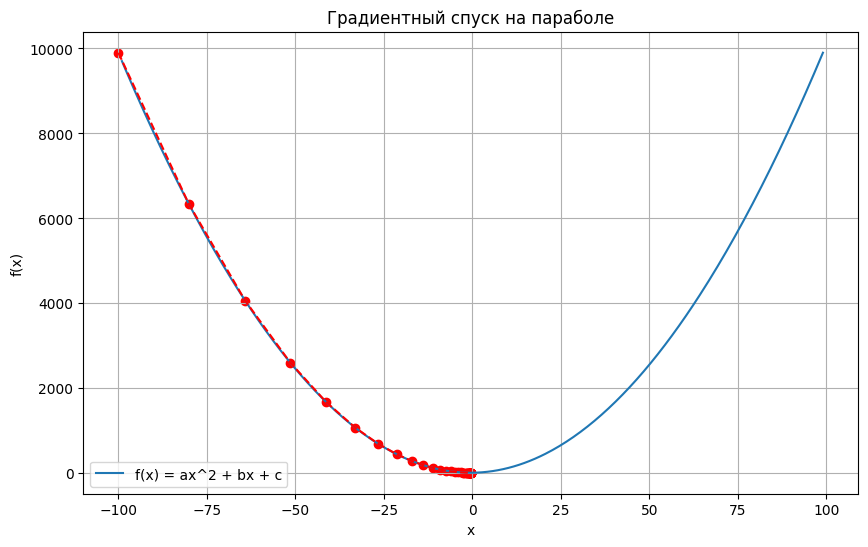

In [24]:
a, b, c = 1, 1, 0
x_start = -100
history = gradient_descent(a, b, c, x_start)

# визуализация
x_history, y_history = zip(*history)
x = np.linspace(-x_start - 1, x_start + 1, 400)
y = a*x**2 + b*x + c

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = ax^2 + bx + c')
plt.scatter(x_history, y_history, color='red')
plt.plot(x_history, y_history, color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск на параболе')
plt.grid(True)
plt.show()

In [25]:
print(f'Точка минимума параболы - {history[-1][0]}')

Точка минимума параболы - -0.5034670689800841


### Задача:
Используйте функцию minimize из библиотеки SciPy для поиска минимума функции Розенброка и Химмельблау

In [18]:
from scipy.optimize import minimize
import numpy as np

# Функция Розенброка
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Нахождение минимума функции Розенброка
# импользуем метод без градиентного спуска
result_rosenbrock = minimize(rosenbrock, [0.7, 1.2], method='nelder-mead')

# Вывод результата
print("Минимум функции Розенброка:")
print("Найденное значение переменных:", result_rosenbrock.x)
print("Значение функции в найденной точке:", result_rosenbrock.fun)
print()

# Функция Химмельблау
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Нахождение минимума функции Химмельблау
# используем градиентный метод
result_himmelblau = minimize(himmelblau, [0.7, 1.2], method='BFGS')

# Вывод результата
print("Минимум функции Химмельблау:")
print("Найденное значение переменных:", result_himmelblau.x)
print("Значение функции в найденной точке:", result_himmelblau.fun)

Минимум функции Розенброка:
Найденное значение переменных: [0.99998167 0.99996251]
Значение функции в найденной точке: 4.040655806765731e-10

Минимум функции Химмельблау:
Найденное значение переменных: [2.99999999 1.99999998]
Значение функции в найденной точке: 9.445523975209378e-15
